# Experiments with UJIIndoorLoc (multiclass)

We consider two scenarios.
Scenario 1 is similar to what we have for the two binary datasets in the paper,
wheras scenario 2 is different.

The dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/ujiindoorloc.

## 1 Reading the dataset in Scenario 1

Scenario 1 uses only the file trainingData.csv.
The first 10000 observations are used as training set,
and the remaining 9937 observations as test set.

In [1]:
import time
start = time.time()

import numpy as np
import matplotlib.pyplot as plt

# Replace by the location on your computer:
dataset = np.loadtxt("C:/DnB/Work/R/Data/MachineLearning/UJIIndoorLoc/trainingData.csv",skiprows=1,delimiter=',')

order = np.argsort(dataset[:,528])
dataset_sorted = dataset[order]

N_train = 10000
N_total = dataset.shape[0]   # the size of the dataset
N_test = N_total - N_train

X_train = np.delete(dataset_sorted[:N_train],[520,521,522,523,524,525,526,527,528],1) # matrix of training objects
X_test = np.delete(dataset_sorted[N_train:N_total],[520,521,522,523,524,525,526,527,528],1) # matrix of test objects
y_train = dataset_sorted[:N_train,523].astype(int)  # vector of training labels as integers (the building, 0 to 2)
y_test = dataset_sorted[N_train:N_total,523].astype(int) # vector of test labels as integers (the building, 0 to 2)

# Basic sanity checks:
print("Dataset shape:",dataset.shape)
print("Sorted timestamps:",dataset_sorted[:10,528].astype(int))
print("The shapes of X_train y_train X_test y_test:",X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Dataset shape: (19937, 529)
Sorted timestamps: [1369908924 1369908928 1369908931 1369908935 1369908940 1369908943
 1369908944 1369908946 1369908948 1369908951]
The shapes of X_train y_train X_test y_test: (10000, 520) (10000,) (9937, 520) (9937,)
Time elapsed: 7.146721363067627


The training set has all three buildings, but mostly 0.

(array([5249.,    0.,    0.,    0.,    0., 3026.,    0.,    0.,    0.,
        1725.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

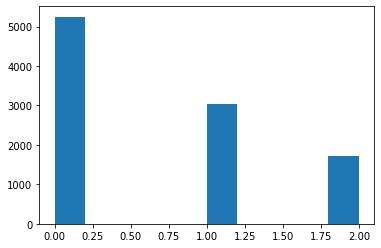

In [2]:
plt.hist(y_train)

Whereas the test set has only two buildings.

(array([2170.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7767.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

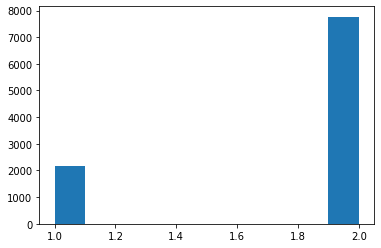

In [3]:
plt.hist(y_test)

## 2 Reading the dataset in Scenario 2

Scenario 2 uses only the file trainingData.csv as training set
and the file validationData.csv as test set.

In [4]:
import time
start = time.time()

import numpy as np
import matplotlib.pyplot as plt

# Replace by the location on your computer:
train_set = np.loadtxt("C:/DnB/Work/R/Data/MachineLearning/UJIIndoorLoc/trainingData.csv",skiprows=1,delimiter=',')
test_set = np.loadtxt("C:/DnB/Work/R/Data/MachineLearning/UJIIndoorLoc/validationData.csv",skiprows=1,delimiter=',')

N_train = train_set.shape[0]  # the size of the test set
N_test = test_set.shape[0]    # the size of the test set
N_total = N_train + N_test    # the overall number of observations

order = np.argsort(test_set[:,528])
test_set_sorted = test_set[order]

X_train = np.delete(train_set,[520,521,522,523,524,525,526,527,528],1) # matrix of training objects
X_test = np.delete(test_set_sorted,[520,521,522,523,524,525,526,527,528],1) # matrix of test objects
y_train = train_set[:,523].astype(int)  # vector of training labels as integers (the building, 0 to 2)
y_test = test_set_sorted[:,523].astype(int) # vector of test labels as integers (the building, 0 to 2)

# Basic sanity checks:
print("The shape of the training set:",train_set.shape)
print("The shape of the test set:",test_set.shape)
print("Sorted timestamps in the test set:",test_set_sorted[:10,528].astype(int))
print("The shapes of X_train y_train X_test y_test:",X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

The shape of the training set: (19937, 529)
The shape of the test set: (1111, 529)
Sorted timestamps in the test set: [1379578367 1379578399 1379578500 1379578525 1379578561 1379578603
 1379578656 1379578686 1379578784 1379578808]
The shapes of X_train y_train X_test y_test: (19937, 520) (19937,) (1111, 520) (1111,)
Time elapsed: 7.173128366470337


The training set had building 2 in majority.

(array([5249.,    0.,    0.,    0.,    0., 5196.,    0.,    0.,    0.,
        9492.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

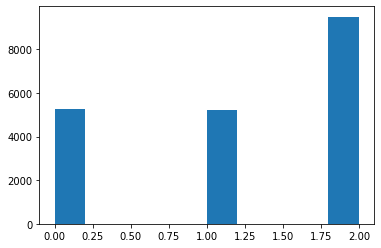

In [5]:
plt.hist(y_train)

The test set had building 0 in majority.

(array([536.,   0.,   0.,   0.,   0., 307.,   0.,   0.,   0., 268.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

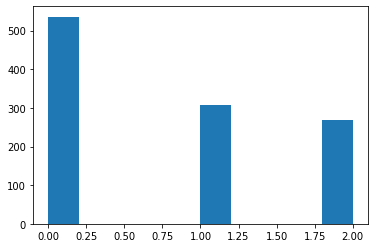

In [6]:
plt.hist(y_test)

## 3 Confusion matrix for UJIIndoorLoc

Let us use the standard prediction algorithms in scikit-learn.

### 3.1 Neural Nets

First, Neural Nets.

In [7]:
start = time.time()

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=2021).fit(X_train,y_train)

# Evaluating the quality:
y_pred = mlp.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

from sklearn.metrics import confusion_matrix
print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 1
Confusion matrix:
[[535   1   0]
 [  0 307   0]
 [  0   0 268]]
Time elapsed: 8.126976728439331


### 3.2 Support Vector Machines

We only use kernel SVM.

In [8]:
start = time.time()

from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)

# Evaluating the quality:
y_pred = svm.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 3
Confusion matrix:
[[534   2   0]
 [  0 306   1]
 [  0   0 268]]
Time elapsed: 11.679672002792358


### 3.3 Decision Trees

In [9]:
start = time.time()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=2021).fit(X_train, y_train)

# Evaluating the quality:
y_pred = tree.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 21
Confusion matrix:
[[533   2   1]
 [  0 291  16]
 [  0   2 266]]
Time elapsed: 0.7516875267028809


### 3.4 Ensemble methods

First random forest.

In [10]:
start = time.time()

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=2021).fit(X_train, y_train)  # default: n_estimators=100

# Evaluating the quality:
y_pred = forest.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

from sklearn.metrics import confusion_matrix
print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 2
Confusion matrix:
[[536   0   0]
 [  1 305   1]
 [  0   0 268]]
Time elapsed: 3.035842180252075


Now Gradient Boosting.

In [11]:
start = time.time()

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=2021).fit(X_train, y_train)  # default: n_estimators=100

# Evaluating the quality:
y_pred = gb.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 2
Confusion matrix:
[[534   2   0]
 [  0 307   0]
 [  0   0 268]]
Time elapsed: 53.70748805999756


The most difficult pair in Scenario 1 is still (1,2).

### 3.5 Naive Bayes

In [12]:
start = time.time()

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

# Evaluating the quality:
y_pred = nb.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

from sklearn.metrics import confusion_matrix
print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 9
Confusion matrix:
[[536   0   0]
 [  0 298   9]
 [  0   0 268]]
Time elapsed: 0.24141430854797363


### 3.6 Logistic Regression

In [13]:
start = time.time()

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train, y_train)

# Evaluating the quality:
y_pred = logistic.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

from sklearn.metrics import confusion_matrix
print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 0
Confusion matrix:
[[536   0   0]
 [  0 307   0]
 [  0   0 268]]
Time elapsed: 2.722029447555542


C:\Users\uhac013\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 4 The log loss of standard algorithms

Let us define the truncation function
(it is close to, but different from, what we are using in the binary case).

In [14]:
epsilon = 10**(-2)  # default: 10**(-2)  # the safety threshold for the log loss function
def truncate(p):  # p is a probability vector
  p = np.maximum(p,epsilon)
  p = p/np.sum(p)
  return p

Let us evaluate the quality of various probabilistic classifiers.

In [15]:
import time   # for timing
start = time.time()

import numpy as np
import matplotlib.pyplot as plt

# Evaluating the quality of Neural Networks:
# y_pred = mlp.predict(X_test)
# p_pred = mlp.predict_proba(X_test)

# Evaluating the quality of SVM:
# svm = SVC(probability=True).fit(X_train,y_train)
# y_pred = svm.predict(X_test)
# p_pred = svm.predict_proba(X_test)

# Evaluating the quality of Decision Trees:
# y_pred = tree.predict(X_test)
# p_pred = tree.predict_proba(X_test)

# Evaluating the quality of Random Forest:
y_pred = forest.predict(X_test)
p_pred = forest.predict_proba(X_test)

# Evaluating the quality of Gradient Boosting:
# y_pred = gb.predict(X_test)
# p_pred = gb.predict_proba(X_test)

# Evaluating the quality of Naive Bayes:
# y_pred = nb.predict(X_test)
# p_pred = nb.predict_proba(X_test)

# Evaluating the quality of Logistic Regression:
# y_pred = logistic.predict(X_test)
# p_pred = logistic.predict_proba(X_test)

print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

cum_loss = 0  # initialization
for n in range(N_test):
  predicted = truncate(p_pred[n])[y_test[n]]
  if predicted==0:
    print("Infinity")
  else:
    cum_loss += -np.log(predicted)
print("Cumulative log loss:",cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 2 out of 1111
Cumulative log loss: 38.289547023879884
Time elapsed: 0.07444238662719727


## 5 Multiclass martingale

First we define a useful function setting a vector of $\alpha$s given its index.

In [16]:
def set_alpha(a_index):
  result = np.empty(3)  # initializing the result
  current_index = a_index
  for i in range(3):  # going over all digits
    result[i] = current_index % 2
    current_index = current_index // 2
  return result.astype(int)

set_alpha(7)  # testing

array([1, 1, 1])

The following cell implements a general Cox Composite Jumper (CJ) martingale and its components (SJ martingales).
It is used for Figure S.10 in the supplementary material (for Scenario 1).

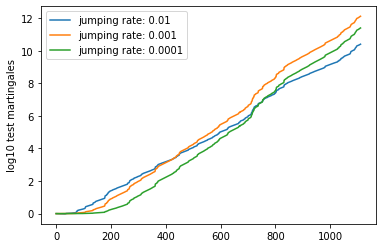

Final values of SJs on the log scale: [10.39787775 12.11277536 11.39418534]
Final value of CJ on the log scale: 11.417569348346001
Time elapsed: 1.816861867904663


In [17]:
import time   # for timing
start = time.time()

# Parameters
# pi = 0.5  # assumed but not used explicitly
Jrates = [10**(-2),10**(-3),10**(-4)]  # the jumping rates; canonical: 0.01, 0.001, 0.0001
delta = 1
beta = [1, 0.5, 2]
NJ = len(Jrates)

# Cox's calibrating functions (general):
Ncal_alpha = 2**3-1     # the number of alpha calibrators
Ncal_beta = len(beta) # the number of beta calibrators
def Cox(p,alpha_index,beta_index):
  p_beta = p**beta[beta_index]
  p_mod = p_beta*np.exp(delta*alpha_index)
  return p_mod/np.sum(p_mod)
Ncal = Ncal_alpha * Ncal_beta  # the total number of calibrators

# Arithmetic average of numbers given on the log10 scale:
def log_mean(x):
  m = np.max(x)
  return m+np.log10(np.mean(np.exp(np.log(10)*(x-m))))

# initializing the SJ and CJ test martingales on the log scale (including the initial value of 0):
log_SJ_martingale = np.zeros((NJ,(N_test+1)))
log_CJ_martingale = np.zeros(N_test+1)

# Processing the dataset
for J_index in range(NJ):  # going over all jumping rates
  Jrate = Jrates[J_index]  # the current jumping rate
  MartCap = np.zeros((Ncal_alpha,Ncal_beta))  # the total capital of martingales in each state
  MartCap[0,0] = 1  # the initial distribution for each jumping rate is concentrated at 0
  for n in range(N_test):
    # Jump mixing starts
    Capital = np.sum(MartCap[:,:])  # redundant; Capital=1
    MartCap[:,:] = (1-Jrate)*MartCap[:,:] + (Jrate/Ncal)*Capital
    # Jump mixing ends
    for a_index in range(Ncal_alpha):
      alpha = set_alpha(a_index)
      for k in range(Ncal_beta):
        ppp = truncate(p_pred[n])    # base prediction
        new_ppp = Cox(ppp,alpha,k)   # our new prediction
        if ppp[y_test[n]]!=0:
          MartCap[a_index,k] *= new_ppp[y_test[n]] / ppp[y_test[n]]
    increase = np.sum(MartCap[:,:])   # relative increase in my capital
    log_SJ_martingale[J_index,n+1] = log_SJ_martingale[J_index,n] + np.log10(increase)
    MartCap[:,:] /= increase
  plt.plot(log_SJ_martingale[J_index,:],label='jumping rate: '+str(Jrate))  # for SJ martingales

for n in range(N_test+1):
  log_CJ_martingale[n] = log_mean([0,log_mean(log_SJ_martingale[:,n])])  # 1 becomes 0 on the log scale

# plt.plot(log_CJ_martingale,c='b')   # for CJ martingale
plt.ylabel('log10 test martingales')  # choose singular or plural
plt.legend()  # for SJ martingales
# plt.savefig("UJI_SJs.pdf", bbox_inches='tight')
plt.show()

# Interesting values for the caption or text:
print("Final values of SJs on the log scale:", log_SJ_martingale[:,N_test])
print("Final value of CJ on the log scale:", log_CJ_martingale[N_test])

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

## 6 Turning the test martingale into a predictive system

Here we implement Algorithm 2 for $\pi=0.5$ and for a range of jumping rates.
It is used for Tables 3 and 4.

In [18]:
import time   # for timing
start = time.time()

# Parameters
pi = 0.5  # the prior weight of the passive elementary predictor
Jrates = [10**(-2),10**(-3),10**(-4)]  # the jumping rates
delta = 1
beta = [1, 0.5, 2]

NJ = len(Jrates)

# Cox's calibrating functions (general):
Ncal_alpha = 2**3-1     # the number of alpha calibrators
Ncal_beta = len(beta)   # the number of beta calibrators
Ncal = Ncal_alpha * Ncal_beta
def Cox(p,alpha_index,beta_index):  # alpha_index is a vector index, beta_index is a scalar index
  p_beta = p**beta[beta_index]
  p_mod = p_beta*np.exp(delta*alpha_index)
  return p_mod/np.sum(p_mod)

def set_alpha(a_index):
  result = np.empty(3)  # initializing the result
  current_index = a_index
  for i in range(3):  # going over all digits
    result[i] = current_index % 2
    current_index = current_index // 2
  return result.astype(int)

# initializing the predicted probabilities:
p_prime = np.empty((N_test,3))

# Processing the dataset
P_weight = pi    # amount set aside (passive weight)
A_weight = np.zeros((NJ,Ncal_alpha,Ncal_beta))  # the weight of each active state
A_weight[:,0,0] = (1-pi)/NJ    # initial weights (concentrated at the neutral alpha and beta)
for n in range(N_test):  # going through all test observations
  # Jump mixing starts
  for J_index in range(NJ):
    Capital = np.sum(A_weight[J_index,:,:])  # active capital for this jumping rate
    Jrate = Jrates[J_index]
    A_weight[J_index,:,:] = (1-Jrate)*A_weight[J_index,:,:] + Capital*Jrate/Ncal
  # Jump mixing ends
  ppp = truncate(p_pred[n])   # base prediction
  new_ppp = ppp*P_weight    # initializing the new prediction to its passive component
  for a_index in range(Ncal_alpha):
    alpha = set_alpha(a_index)
    for k in range(Ncal_beta):
      cal_ppp = Cox(ppp,alpha,k)  # prediction calibrated by Cox's calibrator (alpha,k)
      for J_index in range(NJ):
        new_ppp += cal_ppp * A_weight[J_index,a_index,k]  # accumulating calibrated predictions
  p_prime[n] = new_ppp   # my prediction
  P_weight *= ppp[y_test[n]]  # updating the passive capital
  for a_index in range(Ncal_alpha):
    alpha = set_alpha(a_index)
    for k in range(Ncal_beta):
      cal_ppp = Cox(ppp,alpha,k)  # prediction calibrated by the k-th calibrator
      for J_index in range(NJ):
        A_weight[J_index,a_index,k] *= cal_ppp[y_test[n]]  # updating the active capital
  Capital = P_weight + np.sum(A_weight[:,:,:])  # the overall capital
  P_weight /= Capital  # normalization of the passive weight
  A_weight[:,:,:] /= Capital  # normalization of the active weights

# Log loss for the base predictive model:
cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = p_pred[n,y_test[n]]
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(p_pred[n])[y_test[n]])
print("Base log loss:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# Number of errors for the base predictive model:
num_errors = 0  # initialization of the number of errors
for n in range(N_test):
  point_pred = np.argmax(p_pred[n,:])  # the point prediction
  if y_test[n] != point_pred:
    num_errors += 1
print("Base number of errors:",num_errors)

# Log loss for the protected predictive model:
cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = p_prime[n,y_test[n]]
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(p_prime[n])[y_test[n]])
print("Protected log loss:",cum_loss,"with",num_infty,"infinities; modified log loss (meaningless):",mod_cum_loss)

# Number of errors for the protected predictive model:
num_errors = 0  # initialization of the number of errors
for n in range(N_test):
  point_pred = np.argmax(p_prime[n,:])  # the point prediction
  if y_test[n] != point_pred:
    num_errors += 1
print("Protected number of errors:",num_errors)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Base log loss: 8.590998224444432 with 0 infinities; modified loss: 16.628938987046322
Base number of errors: 2
Protected log loss: 5.211369638700127 with 0 infinities; modified log loss (meaningless): 12.215561228862814
Protected number of errors: 1
Time elapsed: 0.9527468681335449
